In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
import glob
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.manifold import TSNE
from colour import Color
from sklearn.covariance import EllipticEnvelope
from itertools import combinations
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
import glob
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
%matplotlib inline
# from pptx import Presentation
# from pptx.util import Inches
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.manifold import TSNE
from colour import Color
from sklearn.covariance import EllipticEnvelope
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
#from sklearn.linear_model import SGDOneClassSVM
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
from psynlig import plot_correlation_heatmap
#import pingouin as pg
from scipy.stats import pearsonr
import plotly.express as px
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import chart_studio as cs
import numpy as np
import pandas as pd
import scipy
import chart_studio.plotly as py
from plotly.offline import iplot
import pandas as pd
import numpy as np  
%matplotlib inline  
from plotly import __version__ 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import chart_studio.plotly as py
from sklearn import preprocessing
from pandas.plotting import scatter_matrix 
from psynlig import plot_correlation_heatmap
#import pingouin as pg
from scipy.stats import pearsonr

In [3]:
##functions

In [4]:
def summarize_dataframe(df, group_col):
    """
    This function takes a pandas DataFrame and a column to group by as inputs and returns
    a summary DataFrame with statistical parameters for each group.
    """
    # Group the DataFrame by the specified column
    grouped_df = df.groupby(group_col)
   
    # Define a dictionary to hold the statistical parameters to compute for each column
    agg_dict = {}
   
    # Loop over the columns in the DataFrame and add the statistical parameters to the agg_dict
    for col in df.columns:
        if col != group_col:
            agg_dict[col] = [
                ('count', 'count'),
                ('mean', 'mean'),
                ('std', 'std'),
                ('min', 'min'),
                ('25%', lambda x: np.quantile(x, 0.25)),
                ('median', 'median'),
                ('75%', lambda x: np.quantile(x, 0.75)),
                ('max', 'max')
                
            ]
   
    # Compute the summary statistics for each group and column using the agg_dict
    summary_df = grouped_df.agg(agg_dict)
   
    # Flatten the multi-index column names into a single level
    summary_df.columns = [f'{col}_{stat}' for col, stat in summary_df.columns]
   
    # Rename the index column
    summary_df.index.name = group_col
   
    # Return the summary DataFrame
    return summary_df

In [5]:
def add_plate_column(folder_path):
    files = os.listdir(folder_path)
    output_folder = os.path.join(folder_path, "output")
    os.makedirs(output_folder, exist_ok=True)
   
    for i, file in enumerate(files):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            output_path = os.path.join(output_folder, file)
           
            df = pd.read_csv(file_path)
            df.insert(0, "plate", f"p{i+1}")
            df['Row'] = 'r' + df['Row'].astype(str)
            df['Column'] = 'c' + df['Column'].astype(str)
            df["pos"] = df["Row"].astype(str) + df["Column"].astype(str)  + df["plate"].astype(str) 
            df.to_csv(output_path, index=False)

In [6]:
def dist_check_if_hc(frame):
    frame = frame.drop(columns=['Local Outlier Factor 30', 'Local Outlier Factor 30_outliers',
       'Local Outlier Factor 10', 'Local Outlier Factor 10_outliers',
       'Local Outlier Factor 8', 'Local Outlier Factor 8_outliers', 'group',
       'group_with_id', 'group_with_p'])
    print("frame_ready")
    for col in frame:
            
            plt.hist(frame[col])
            plt.title(f"Histogram of hc({col})")
            plt.xlabel(f"hc({col})")
            plt.ylabel("Frequency")
            plt.show()
            plt.savefig(path + '//' + f"hist_hc{col}.pdf", dpi = 600)
            plt.close()
            print("hist_done!")
            plt.figure()
            scipy.stats.probplot(frame[col], dist="norm", plot=plt)
            plt.title(f"Q-Q-{col}")
            plt.show
            plt.savefig(path + '//' + f"Q-Q_hc{col}.pdf", dpi = 600)
            plt.close()
            print("qq_done:)")
            plt.figure()
            sns.distplot(frame[col], kde = True, color ='red', bins = 30)
            plt.title(f"dist-{col}")
            plt.show
            plt.savefig(path + '//' + f"dist_hc{col}.pdf", dpi = 600)
            plt.close()
            print("on it:)")
            print("done:)")
        

In [7]:
def dist_check_if_max(frame):
    
    print("frame_ready")
    for col in frame:
            #Nh_df_24 = Nh_df_24.drop(columns=["PC", "group_with_pc", "group", "group_with_id"])
            plt.hist(frame[col])
            plt.title(f"Histogram of max({col})")
            plt.xlabel(f"max({col})")
            plt.ylabel("Frequency")
            plt.show()
            plt.savefig(path + '//' + f"hist_max{col}.pdf", dpi = 600)
            plt.close()
            print("hist_done!")
            plt.figure()
            scipy.stats.probplot(frame[col], dist="norm", plot=plt)
            plt.title(f"Q-Q-{col}")
            plt.show
            plt.savefig(path + '//' + f"Q-Q_max{col}.pdf", dpi = 600)
            plt.close()
            print("qq_done:)")
            plt.figure()
            sns.distplot(frame[col], kde = True, color ='red', bins = 30)
            plt.title(f"dist-{col}")
            plt.show
            plt.savefig(path + '//' + f"dist_max{col}.pdf", dpi = 600)
            plt.close()
            print("on it:)")
            print("done:)")

In [8]:
def dist_check_if_log(frame):
    
    print("frame_ready")
    for col in frame:
            #Nh_df_24 = Nh_df_24.drop(columns=["PC", "group_with_pc", "group", "group_with_id"])
            plt.hist(frame[col])
            plt.title(f"Histogram of log({col})")
            plt.xlabel(f"log({col})")
            plt.ylabel("Frequency")
            plt.show()
            plt.savefig(path + '//' + f"hist_log{col}.pdf", dpi = 600)
            plt.close()
            print("hist_done!")
            plt.figure()
            scipy.stats.probplot(frame[col], dist="norm", plot=plt)
            plt.title(f"Q-Q-{col}")
            plt.show
            plt.savefig(path + '//' + f"Q-Q_log{col}.pdf", dpi = 600)
            plt.close()
            print("qq_done:)")
            plt.figure()
            sns.distplot(frame[col], kde = True, color ='red', bins = 30)
            plt.title(f"dist-{col}")
            plt.show
            plt.savefig(path + '//' + f"dist_log{col}.pdf", dpi = 600)
            plt.close()
            print("on it:)")
            print("done:)")

In [9]:
def dist_check_if_log_2(frame):
    
    print("frame_ready")
    for col in frame:
            #Nh_df_24 = Nh_df_24.drop(columns=["PC", "group_with_pc", "group", "group_with_id"])
            plt.hist(frame[col])
            plt.title(f"Histogram of log+1({col})")
            plt.xlabel(f"log+1({col})")
            plt.ylabel("Frequency")
            plt.show()
            plt.savefig(path + '//' + f"hist_log+1{col}.pdf", dpi = 600)
            plt.close()
            print("hist_done!")
            plt.figure()
            scipy.stats.probplot(frame[col], dist="norm", plot=plt)
            plt.title(f"Q-Q-{col}")
            plt.show
            plt.savefig(path + '//' + f"Q-Q_log+1{col}.pdf", dpi = 600)
            plt.close()
            print("qq_done:)")
            plt.figure()
            sns.distplot(frame[col], kde = True, color ='red', bins = 30)
            plt.title(f"dist-{col}")
            plt.show
            plt.savefig(path + '//' + f"dist_log+1{col}.pdf", dpi = 600)
            plt.close()
            print("on it:)")
            print("done:)")

In [ ]:
# t test function
def t_function(list):
    for item in list:
        name = [i for i in globals() if globals()[i] is item][0]
        item1 = list[0]
        item2 = list[1]
        twosample_results = scipy.stats.ttest_ind(item1, item2, equal_var=False, permutations=1000)
        matrix_twosample = [
        ['', 'Test Statistic', 'p-value'],
        ['{}'.format(name), twosample_results[0], twosample_results[1]]
    ]
        twosample_table = FF.create_table(matrix_twosample, index=True)
        cf.go_offline()
        iplot(twosample_table, filename='{}twosample-table')

In [ ]:
### drp 
add_plate_column('C:/Users/Uri8s/DRP1')

In [10]:
## drp res path
path = ('DRP_res') 
if not os.path.exists(path):
    os.mkdir(path)
    print('Output folder created')

Output folder created


In [ ]:
#drp1
all_files = glob.glob('C:/Users/Uri8s/output_drp/*.csv')

li = []

for filename in all_files:
    df = pd.read_csv(filename)

    li.append(df)

drp1_df = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
#index frame
drp1_df["group"] = drp1_df["Severity"].astype(str) + drp1_df["Compound"].astype(str)
drp1_df.set_index(["group"], inplace = True,
                            append = True, drop = False)
drp1_df["group_with_id"] = drp1_df["Severity"].astype(str) + drp1_df["Compound"].astype(str) + drp1_df["Cell ID"].astype(str) 
drp1_df.set_index(["group_with_id"], inplace = True,
                            append = True, drop = False)
drp1_df["group_with_p"] = drp1_df["Severity"].astype(str) + drp1_df["Compound"].astype(str) + drp1_df["Cell ID"].astype(str) + drp1_df["plate"].astype(str)
drp1_df.set_index(["group_with_p"], inplace = True,
                            append = True, drop = False)
drp1_df["group_p"] = drp1_df["Severity"].astype(str) + drp1_df["Compound"].astype(str) + drp1_df["plate"].astype(str)
drp1_df.set_index(["group_p"], inplace = True,
                            append = True, drop = False)


In [ ]:
# Values to be removed based on the "Group" column
groups_to_remove = ["HCDMSO1650.0p6", "HCDMSO1650.0p7", "HCDMSO1650.0p9",
"HCDMSO1653.0p4", "HCDMSO1653.0p8", "HCDMSO495.0p7",
"HCDMSO730.0p8", "HCDMSO848.0p5", "HCDMSO951.0p10"]
# Remove rows with the specified values in the "Group" column
drp1_df = drp1_df[~drp1_df['group_with_p'].isin(groups_to_remove)]
# Display the filtered DataFrame
drp1_df

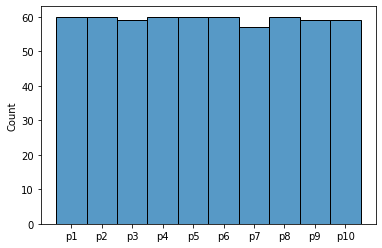

Total number of cell types 594


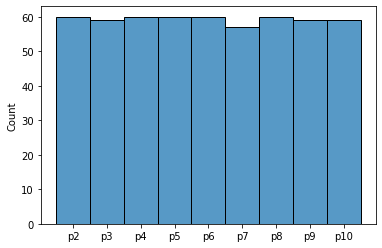

Total number of cells 534


In [38]:
plate_types =  drp1_df["plate"].values
sns.histplot(plate_types)
plt.show()
print(f'Total number of cell types {len(plate_types)}')
drp1_df = drp1_df.loc[plate_types != 'p1']
sns.histplot(drp1_df["plate"].values)
plt.show()
print(f'Total number of cells {len(drp1_df)}')

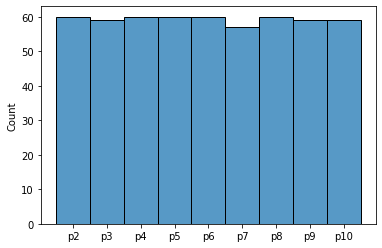

Total number of cell types 534


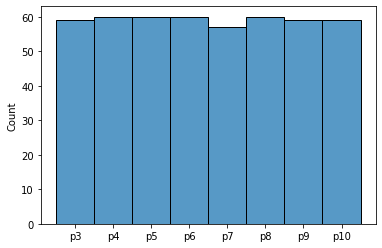

Total number of cells 474


In [39]:
plate_types =  drp1_df["plate"].values
sns.histplot(plate_types)
plt.show()
print(f'Total number of cell types {len(plate_types)}')
drp1_df = drp1_df.loc[plate_types != 'p2']
sns.histplot(drp1_df["plate"].values)
plt.show()
print(f'Total number of cells {len(drp1_df)}')

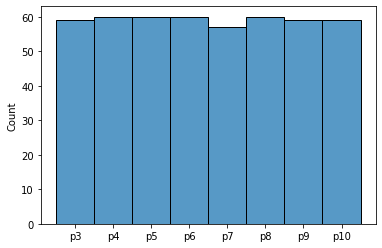

Total number of cell types 474


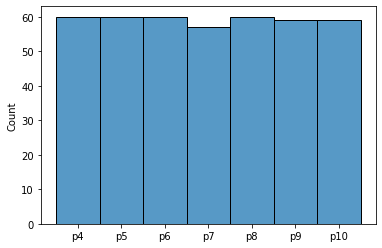

Total number of cells 415


In [40]:
plate_types =  drp1_df["plate"].values
sns.histplot(plate_types)
plt.show()
print(f'Total number of cell types {len(plate_types)}')
drp1_df = drp1_df.loc[plate_types != 'p3']
sns.histplot(drp1_df["plate"].values)
plt.show()
print(f'Total number of cells {len(drp1_df)}')

In [44]:
drp1_df_sum = drp1_df.drop(columns=["group", "group_with_id","group_with_p", "group_p", "Cell ID", "plate", "Row", "Column", "Cell Type",
                                    "Plane", "Timepoint", "Height [µm]", "Time [s]", "Compound", "Severity", "pos" ])
drp1_df_sum = drp1_df_sum.reset_index()
drp1_df_sum = drp1_df_sum.drop(columns=["group_with_id","group", "group_p", "level_0"])
sum1 = summarize_dataframe(drp1_df_sum, "group_with_p")
sum1 = sum1.reset_index()
sum1.to_csv(path + "//" + 'drp1_sum1a.csv', index=None)

In [ ]:
# clear low and high cell count
cell_count =  drp1_df["all_cells - Number of Objects"].values
sns.histplot(cell_count)
plt.show()
drp1_df = drp1_df.loc[cell_count<1400]
sns.histplot(drp1_df["all_cells - Number of Objects"].values)
plt.show()
drp1_df = drp1_df.loc[cell_count>400]
sns.histplot(drp1_df["all_cells - Number of Objects"].values)
plt.show()

In [48]:
drp1_df.to_csv(path + "//" + 'drp1_df1.csv', index=None)    

In [ ]:
#cell count per group validation
drp1_df_count = drp1_df.groupby(level=1).mean()
drp1_df_count = drp1_df_count.reset_index()
count_cells = px.bar(drp1_df_count, x = "group", y = "all_cells - Number of Objects",
            barmode = 'group')

count_cells.show()

In [ ]:
#keep features by feat selection analysis&modify
drp1_df2 = drp1_df[['group', 'group_with_id', "group_with_p", "Cell ID", "group_p",
                           "all_cells - chanel_4_Intensity Mean - Mean per Well", "total_ir_chanel_4_normalized"]]
drp1_df2.columns = [str(col) + '_drp1' for col in drp1_df2.columns]
drp1_df2 = drp1_df2.rename(
     columns={"group_drp1":"group",
              "group_with_id_drp1":"group_with_id",
              "group_with_p_drp1":"group_with_p",
              "group_p_drp1":"group_p",
              "Cell ID_drp1":"Cell_id",
              "all_cells - chanel_4_Intensity Mean - Mean per Well_drp1":"drp1_intensity",
              "total_ir_chanel_4_normalized_drp1":"drp1_area"})
print(drp1_df2)
drp1_df2.to_csv(path + "//" + 'drp1_df2.csv', index=None) 

In [ ]:
#summary 2
drp1_df_sum = drp1_df2.drop(columns=["group", "group_with_id","group_with_p", "group_p"])
drp1_df_sum = drp1_df_sum.reset_index()
drp1_df_sum = drp1_df_sum.drop(columns=["Cell_id", "group_with_id","group", "level_0", "group_p"])
sum2 = summarize_dataframe(drp1_df_sum, "group_with_p")
sum2 = sum2.reset_index()
sum2.to_csv(path + "//" + 'drp1_sum2b.csv', index=None)

In [ ]:
# OUTLIER DETECTION MODE 
DataFrame_OutliersDetections = drp1_df2.copy()
types = drp1_df2["group"].unique()
mask = []
features = drp1_df2.columns[5:]
#['LysoSpots-RSI', 'LysoSpots-CSI', 'LysoSpots-USPI', 'LysoSpots-SC', 'LysoSpots-SBI', 'LysoSpots-RI', 'LysoSpots-STRI', 'LysoSpots-SAUM', 'LysoSpots-SR', 'TmreSpots-RSI', 'TmreSpots-CSI', 'TmreSpots-USPI', 'TmreSpots-SC', 'TmreSpots-SBI', 'TmreSpots-SAPX', 'TmreSpots-RI', 'TmreSpots-STRI', 'TmreSpots-SAUM', 'TmreIArea-UM', 'TmreIArea-R', 'LysoIArea-UM', 'LysoIArea-R', 'TmreIntensityMean', 'TmreIntensitySum', 'Calceinarea', 'CalceinR', 'Nucarea', 'NucR', 'TmreTSarea', 'LysointensityMean', 'LysointensitySum', 'LysoTSarea', 'CalceinIntensityMean', 'NucIntensityMean']
# features = ['LysoSpots-RSI', 'LysoSpots-CSI', 'LysoSpots-USPI', 'LysoSpots-SC', 'LysoSpots-SBI', 'LysoSpots-SAPX', 'LysoSpots-RI', 'LysoSpots-STRI', 'LysoSpots-SAUM', 'LysoSpots-SR', 'TmreSpots-RSI', 'TmreSpots-CSI', 'TmreSpots-USPI', 'TmreSpots-SC', 'TmreSpots-SBI', 'TmreSpots-SAPX', 'TmreSpots-RI', 'TmreSpots-STRI', 'TmreSpots-SAUM', 'TmreIArea-UM', 'TmreIArea-R', 'LysoIArea-UM', 'LysoIArea-R', 'TmreIntensityMean', 'TmreIntensitySum', 'Calceinarea', 'CalceinR', 'Nucarea', 'NucR', 'TmreTSarea', 'LysointensityMean', 'LysointensitySum', 'LysoTSarea', 'CalceinIntensityMean', 'NucIntensityMean']
print(types)
# detector_list = ['pca_approx', 'robust_cov']


detector_list = [
    
        (
        "Local Outlier Factor 8",
        LocalOutlierFactor(n_neighbors=8),
    ),
    (
        "Local Outlier Factor 10",
        LocalOutlierFactor(n_neighbors=10),
    ),
        (
         "Local Outlier Factor 30",
        LocalOutlierFactor(n_neighbors=30),
        ),
    ]

In [ ]:
for name, algorithm in detector_list:
    errors = np.full(len(DataFrame_OutliersDetections),fill_value=np.nan)
    outliers = np.full(len(DataFrame_OutliersDetections),fill_value=np.nan)

    for type in types:
        x = DataFrame_OutliersDetections.loc[:,features].values
        F = x.sum(1)
        mask = np.zeros(x.shape[0])
        mask[np.isfinite(F)] = 1
        mask_type = mask * np.array(DataFrame_OutliersDetections["group"] == type)
        Curr_df = DataFrame_OutliersDetections.loc[mask_type==1,features]

        x = Curr_df.values
        if name == 'pca_approx':

            x = StandardScaler().fit_transform(x)
            # F = x.sum(1)
            # x = x[np.isfinite(F),:]
            # mask[1-np.isfinite(F)] = False
            # pd.DataFrame(data = Curr_df, columns = features).head()
            # pca = PCA(n_components=2)
            lower_dimensional_data = algorithm.fit_transform(x)
            pproximation = algorithm.inverse_transform(lower_dimensional_data)

            err = np.linalg.norm(x-pproximation,2,axis=1)

            errors[mask_type==1] = err
            outliers[mask_type==1] = (err < 5) * 2 - 1
            if False:
                plt.scatter(lower_dimensional_data[:,0],lower_dimensional_data[:,1],c=err>5)
                plt.title(type)
                plt.show()
        else:
            algorithm.fit(x)
            if name == "Robust covariance":
                errors[mask_type==1] = algorithm.mahalanobis(x)
                outliers[mask_type==1] = algorithm.predict(x)

            if  "Local Outlier Factor" in name:
                errors[mask_type==1] = algorithm.negative_outlier_factor_
                outliers[mask_type==1] = algorithm.fit_predict(x)
            else:
                y_pred = algorithm.fit(x).predict(x)



        # Curr_df[name] = errors[mask_type==1]
        # Curr_df[f'{name}_outliers'] = outliers[mask_type==1]
        # Curr_df.set_index(name, inplace = True,
        #                         append = True, drop = False)
        # file =   f'{type}_df_outliers_det.csv'
        # Curr_df.to_csv(file)
    DataFrame_OutliersDetections[name] = errors
    DataFrame_OutliersDetections[f'{name}_outliers'] = outliers
    DataFrame_OutliersDetections.set_index(name, inplace = True,
                            append = True, drop = False)

    DataFrame_OutliersDetections.to_csv(path + "//" + 'drp1_df4.csv', index=None)    
# print(DataFrame_OutliersDetections)

In [ ]:
DataFrame_OutliersDetections["group"].value_counts()

In [ ]:
# keep data wo outliers
df_clean = DataFrame_OutliersDetections[DataFrame_OutliersDetections['Local Outlier Factor 8_outliers'] == 1]
df_clean["group"].value_counts()

In [ ]:
## export for integ

In [ ]:
df_integ = df_clean.groupby(level=2).mean()
df_integ = df_integ.reset_index()

In [77]:
df_clean.to_csv(path + "//" + 'drp1_df5.csv', index=None)    
df_integ.to_csv(path + "//" + 'drp1_df_integ.csv', index=None)  

In [ ]:
## normalize data

In [78]:
#hc mean norm
hc = df_clean[(df_clean['group'] == 'HCDMSO')]
hc_mean = hc.mean()
Nh_df = df_clean/hc_mean

C:\Users\Uri8s\AppData\Local\Temp/ipykernel_4032/1008584565.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [80]:
df_log = df_clean.drop(columns=["group_with_p", "group", "group_with_id", "group_p",
                           'Local Outlier Factor 8', "Cell_id",
       'Local Outlier Factor 8_outliers', 'Local Outlier Factor 10',
       'Local Outlier Factor 10_outliers', 'Local Outlier Factor 30',
       'Local Outlier Factor 30_outliers'])
for col in df_log:
    df_log[col] = np.log(df_log[col])
    NL_df = df_log.copy()

In [84]:
df_log_2 = df_clean.drop(columns=["group_with_p", "group", "group_with_id", "group_p",
                           'Local Outlier Factor 8', "Cell_id",
       'Local Outlier Factor 8_outliers', 'Local Outlier Factor 10',
       'Local Outlier Factor 10_outliers', 'Local Outlier Factor 30',
       'Local Outlier Factor 30_outliers'])
for col in df_log_2:
        df_log_2[col] = np.log(1+df_log_2[col]-min(df_log_2[col]))
        NL2_df = df_log_2.copy()

In [85]:
df_max_scaled = df_clean.drop(columns=["group_with_p", "group", "group_with_id", "group_p",
                           'Local Outlier Factor 8', "Cell_id",
       'Local Outlier Factor 8_outliers', 'Local Outlier Factor 10',
       'Local Outlier Factor 10_outliers', 'Local Outlier Factor 30',
       'Local Outlier Factor 30_outliers'])
for column in df_max_scaled.columns:
        df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
        NM_df = df_max_scaled.copy()

In [86]:
#initialze the excel writer
writer = pd.ExcelWriter(path + '//' + 'drp1_normalzied-excel.xlsx', engine='xlsxwriter')

    #store your dataframes in a  dict, where the key is the sheet name you want
frames = {'hc': Nh_df, 'log': NL_df, 'log2':NL2_df,
              'max': NM_df}
    #frames = {'HCUN': HCUN, 'DSUN': DSUN}
    #now loop thru and put each on a specific sheet
for sheet, frame in  frames.items(): # .use .items for python 3.X
    frame.to_excel(writer, sheet_name = sheet)

    #critical last step
writer.save()
    #writer.close()
print('done')
#'24_1': N_df_24_1

done


In [ ]:
#feat QC

In [ ]:
## feat test
df_var_calc = df_clean.copy()
df_var_calc = df_var_calc.drop(columns=['Local Outlier Factor 30', 'Local Outlier Factor 30_outliers',
       'Local Outlier Factor 10', 'Local Outlier Factor 10_outliers',
       'Local Outlier Factor 8', 'Local Outlier Factor 8_outliers', 'group', "Cell_id",
       'group_with_id', 'group_with_p', 'group_p'])

In [ ]:
#variance of each feature
feature_variances = df_var_calc.var()

#standard deviation of each feature
feature_std_devs = df_var_calc.std()

#coefficient of variation (CV) for each feature,
feature_cv = df_var_calc.std() / df_var_calc.mean()

# Print the results
print("Feature Variance:")
print(feature_variances)

print("\nFeature Standard Deviation:")
print(feature_std_devs)

print("\nFeature Coefficient of Variation (CV):")
print(feature_cv)


feature_variances.to_csv(path + "//" + 'drp1-feature_variances.csv', index=None)
feature_std_devs.to_csv(path + "//" + 'drp1-feature_std_devs.csv', index=None)
feature_cv.to_csv(path + "//" + 'drp1-feature_coefficient_of_variation.csv', index=None)

In [ ]:
# Visualization

# Plot feature variances
plt.bar(range(len(feature_variances)), feature_variances, align='center')
plt.xticks(range(len(feature_variances)), feature_variances.index, rotation=45)
plt.title('Feature Variance')
plt.ylabel('Variance')
plt.xlabel('features')
plt.show()
plt.savefig(path + '//' + "drp1-feature_var.pdf", dpi = 600)
plt.close()
print("var_done!")

In [ ]:
# Plot feature standard deviations
plt.bar(range(len(feature_std_devs)), feature_std_devs, align='center')
plt.xticks(range(len(feature_std_devs)), feature_std_devs.index, rotation=45)
plt.title('Feature Standard Deviation')
plt.ylabel('Standard Deviation')
plt.xlabel('features')
plt.show()
plt.savefig(path + '//' + "drp1-feature_sd.pdf", dpi = 600)
plt.close()
print("sd_done!")

In [ ]:
# Plot feature coefficient of variation (CV)
plt.bar(range(len(feature_cv)), feature_cv, align='center')
plt.xticks(range(len(feature_cv)), feature_cv.index, rotation=45)
plt.title('Feature Coefficient of Variation (CV)')
plt.ylabel('Coefficient of Variation')
plt.xlabel('features')
plt.show()
plt.savefig(path + '//' + "drp1-feature_cv.pdf", dpi = 600)
plt.close()
print("cv_done!")

plt.tight_layout()
plt.show()

In [83]:
### make sure to groupby mean before plotting

In [ ]:
df_plot = df_clean.groupby(level=5).mean()
df_plot = df_plot.reset_index()
for col in df_plot:
    
    fig = px.bar(df_plot, x = "group_with_id", y = col,
            barmode = 'group')
    fig.write_image(path + '//' + f"{col}mid_plot_image.pdf", engine="kaleido")
    fig.show()

In [ ]:
# test dists

In [ ]:
dist_check_if_hc(Nh_df)
dist_check_if_log(df_log)
dist_check_if_log_2(df_log_2)
dist_check_if_max(df_max_scaled)

In [ ]:
### log norm -vis+stats_marker conclusions 

In [ ]:
df_stats = df_log.copy()
df_stats = df_stats.reset_index()
df_stats = df_stats.drop(columns=['Local Outlier Factor 30', 'Local Outlier Factor 10', 'Local Outlier Factor 8', 'level_0'])
df_stats = df_stats.reset_index()
df_stats = df_stats.drop(columns=['index'])
df_stats.columns

In [ ]:
grouped_df = df_stats.groupby("group").mean()
grouped_df.fillna(0, inplace=True)
grouped_df =(grouped_df-grouped_df.mean())/grouped_df.std()
###heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(grouped_df, cmap='BuPu')
sns.set_style("white")
SMALL_SIZE =3
MEDIUM_SIZE = 5
BIGGER_SIZE = 12
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
cax = plt.gcf().axes[0]
cax.tick_params(labelsize=6)
plt.yticks(rotation="horizontal")
plt.xticks(rotation="vertical")
plt.margins(0.1)
plt.subplots_adjust(bottom=0.3)
plt.savefig(path + '//' + "heatmap_drp1.pdf")
plt.show()

In [ ]:
### box plots all feat
for col in df_stats.columns[3:]:
    
    fig = px.box(df_stats, x = "group", y = col, hover_data=["group_with_id"],
                 points="all", color="group",
            notched=True)
    fig.update_xaxes(categoryorder='array', categoryarray= ['HCDMSO', 'PREDMSO', 'PREmdivi1 25uM',
                                                            'MDMSO', 'Mmdivi1 25uM', 
                                                           'SDMSO', 'Smdivi1 25uM'])
    fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
    fig.update_layout(
    font_family="Arial",
    font_color="Black",
    font_size=20,
    font=dict(
        family="Arial",
        size=20,
        color="Black"
    )
)

    fig.write_image(path + '//' + f"{col}box_plot_image.pdf", engine="kaleido")
    fig.show()

In [ ]:
##statistical testing

In [68]:
#DEF GROUPS
#hc
HC = df_stats[(df_stats['group'] == 'HCDMSO')]
HC_intensity_mean = HC[["drp1_intensity"]]
HC_area = HC[["drp1_area"]]
#ds
#Sev
S = df_stats[(df_stats['group'] == 'SDMSO')]
S_intensity_mean = S[["drp1_intensity"]]
S_area = S[["drp1_area"]]
#Mild
M = df_stats[(df_stats['group'] == 'MDMSO')]
M_intensity_mean = M[["drp1_intensity"]]
M_area = M[["drp1_area"]]
#Pre
P = df_stats[(df_stats['group'] == 'PREDMSO')]
P_intensity_mean = P[["drp1_intensity"]]
P_area = P[["drp1_area"]]
#dsT
#Sev
ST = df_stats[(df_stats['group'] == 'Smdivi1 25uM')]
ST_intensity_mean = ST[["drp1_intensity"]]
ST_area = ST[["drp1_area"]]
#Mild
MT = df_stats[(df_stats['group'] == 'Mmdivi1 25uM')]
MT_intensity_mean = MT[["drp1_intensity"]]
MT_area = MT[["drp1_area"]]
#Pre
PT = df_stats[(df_stats['group'] == 'PREmdivi1 25uM')]
PT_intensity_mean = PT[["drp1_intensity"]]
PT_area = PT[["drp1_area"]]


In [69]:
# hc vs ds 
one_list = [(S_intensity_mean), (HC_intensity_mean)]
two_list = [(M_intensity_mean), (HC_intensity_mean)]
three_list = [(P_intensity_mean), (HC_intensity_mean)]
#ds vs dst 
one2_list = [(S_intensity_mean), (ST_intensity_mean)]
two2_list = [(M_intensity_mean), (MT_intensity_mean)]
three2_list = [(P_intensity_mean), (PT_intensity_mean)]
#DS vs ds 
one3_list = [ (S_intensity_mean), (M_intensity_mean)]
two3_list = [(S_intensity_mean), (P_intensity_mean)]
three3_list = [(M_intensity_mean), (P_intensity_mean)]
#general lists 
all_list = (one_list, two_list, three_list)
sec_list = (one2_list, two2_list, three2_list)
t_list = (one3_list, two3_list, three3_list)

In [ ]:
for x in all_list:
    t_function(x)
    print('done')

In [ ]:
for x in sec_list:
    t_function(x)
    print('done')

In [ ]:
for x in t_list:
    t_function(x)
    print('done')

In [ ]:
######################

In [ ]:
## erase

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
import glob
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
%matplotlib inline
from pptx import Presentation 
from pptx.util import Inches 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.manifold import TSNE
from colour import Color
import matplotlib as mpl
import scipy, random
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from pandas.api.types import CategoricalDtype

In [87]:
import pandas as pd

def create_new_column_based_on_first_letter(df, existing_column, new_column, condition_mapping):
    """
    Create a new column in the DataFrame based on the first letter of an existing column.

    Parameters:
    - df: DataFrame to modify.
    - existing_column: Name of the existing column.
    - new_column: Name of the new column to be added.
    - condition_mapping: Dictionary mapping first letters to values for the new column.

    Returns:
    - Modified DataFrame.
    """
    # Apply the condition based on the first letter
    df[new_column] = df[existing_column].str[0].map(condition_mapping)

    return df

# Example usage
if __name__ == "__main__":
    # Create a sample DataFrame
    data = {
        'ID': [1, 2, 3, 4, 5],
        'Value': ['Apple', 'Banana', 'Orange', 'Grapes', 'Cherry']
    }

    df = pd.DataFrame(data)

    # Define the condition mapping for the new column
    condition_mapping = {'A': 'Fruit', 'B': 'Fruit', 'C': 'Fruit', 'G': 'Fruit', 'H': 'Fruit', 'default': 'Other'}

    # Call the function to create the new column
    df = create_new_column_based_on_first_letter(df, 'Value', 'Category', condition_mapping)

    # Print the modified DataFrame
    print(df)


   ID   Value Category
0   1   Apple    Fruit
1   2  Banana    Fruit
2   3  Orange      NaN
3   4  Grapes    Fruit
4   5  Cherry    Fruit


In [ ]:
##integ

In [73]:
all_files = glob.glob('markers_integ/*.csv')

li = []

for filename in all_files:
    df = pd.read_csv(filename)

    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)
data

,group_with_id,drp1_intensity,drp1_area,Local Outlier Factor 8,Local Outlier Factor 8_outliers,Local Outlier Factor 10,Local Outlier Factor 10_outliers,Local Outlier Factor 30,Local Outlier Factor 30_outliers,mfn1_intensity,mfn1_area,mfn2_intensity,mfn2_area,vat1_intensity,vat1_area
0,HCDMSO1016.0,2.379119,51.857510,-1.060842,1.0,-1.100583,1.0,-1.338116,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,HCDMSO1170.0,2.302811,48.390785,-1.088555,1.0,-1.100087,1.0,-1.297420,0.6,NaN,NaN,NaN,NaN,NaN,NaN
2,HCDMSO143.0,1.836973,34.431071,-1.069845,1.0,-1.077414,1.0,-1.054040,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,HCDMSO1650.0,2.163327,32.421326,-1.087603,1.0,-1.076609,1.0,-1.077832,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,HCDMSO1653.0,1.857600,38.923876,-1.048959,1.0,-1.061574,1.0,-1.071478,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Smdivi1 25uM4287.0,NaN,NaN,-1.085293,1.0,-1.147903,1.0,-1.074160,1.0,NaN,NaN,NaN,NaN,19.747446,458.597783
152,Smdivi1 25uM4476.0,NaN,NaN,-1.104549,1.0,-1.100524,1.0,-1.022343,1.0,NaN,NaN,NaN,NaN,19.433194,379.414395
153,Smdivi1 25uM4687.0,NaN,NaN,-1.050563,1.0,-1.082514,1.0,-0.989281,1.0,NaN,NaN,NaN,NaN,15.733566,237.225849
154,Smdivi1 25uM4709.0,NaN,NaN,-1.049995,1.0,-1.002155,1.0,-0.991223,1.0,NaN,NaN,NaN,NaN,13.029556,233.740103


In [78]:
data["group_with_id"].value_counts()

HCDMSO1016.0            4
PREDMSO4837.0           4
PREmdivi1 25uM4719.0    4
PREmdivi1 25uM4837.0    4
SDMSO2165.0             4
SDMSO305.0              4
SDMSO4287.0             4
SDMSO4476.0             4
SDMSO4687.0             4
SDMSO4709.0             4
SDMSO4807.0             4
Smdivi1 25uM2165.0      4
Smdivi1 25uM305.0       4
Smdivi1 25uM4287.0      4
Smdivi1 25uM4476.0      4
Smdivi1 25uM4687.0      4
Smdivi1 25uM4709.0      4
PREmdivi1 25uM4689.0    4
PREmdivi1 25uM4717.0    4
PREDMSO4719.0           4
MDMSO4799.0             4
HCDMSO143.0             4
HCDMSO1650.0            4
HCDMSO1653.0            4
HCDMSO495.0             4
MDMSO4212.0             4
PREDMSO4717.0           4
MDMSO4715.0             4
MDMSO4887.0             4
Mmdivi1 25uM4212.0      4
Mmdivi1 25uM4715.0      4
Mmdivi1 25uM4721.0      4
Mmdivi1 25uM4799.0      4
PREDMSO4689.0           4
MDMSO4721.0             3
HCDMSO730.0             3
Smdivi1 25uM4807.0      3
MDMSO4819.0             3
Mmdivi1 25uM

In [80]:
df_integ = data.groupby("group_with_id").mean()
df_integ = df_integ.reset_index()
df_integ

,group_with_id,drp1_intensity,drp1_area,Local Outlier Factor 8,Local Outlier Factor 8_outliers,Local Outlier Factor 10,Local Outlier Factor 10_outliers,Local Outlier Factor 30,Local Outlier Factor 30_outliers,mfn1_intensity,mfn1_area,mfn2_intensity,mfn2_area,vat1_intensity,vat1_area
0,HCDMSO1016.0,2.379119,51.857510,-1.107672,1.000000,-1.130929,1.0,-1.225983,0.750000,93.199371,524.273512,130.479738,622.459853,18.021358,308.957196
1,HCDMSO1170.0,2.302811,48.390785,-1.088555,1.000000,-1.100087,1.0,-1.297420,0.600000,NaN,NaN,NaN,NaN,NaN,NaN
2,HCDMSO143.0,1.836973,34.431071,-1.071541,0.900000,-1.050899,1.0,-1.020620,1.000000,94.119298,528.708814,141.783754,636.144935,15.291984,217.949505
3,HCDMSO1650.0,2.163327,32.421326,-1.097501,0.964286,-1.089445,1.0,-1.069950,1.000000,93.210586,460.103357,146.748495,652.347590,16.727077,224.219974
4,HCDMSO1653.0,1.857600,38.923876,-1.067774,0.978261,-1.069927,1.0,-1.076216,0.961019,92.249624,525.101015,136.230494,708.353818,14.982573,222.885921
5,HCDMSO495.0,1.889111,35.095414,-1.007364,1.000000,-1.014304,1.0,-0.998315,1.000000,94.830548,498.778754,147.847893,598.006431,15.910074,217.229895
6,HCDMSO730.0,2.398134,52.320451,-1.067720,1.000000,-1.082097,1.0,-1.142734,0.866667,NaN,NaN,150.506597,757.705303,16.082683,249.582832
7,HCDMSO951.0,NaN,NaN,-1.203132,1.000000,-1.236509,1.0,-1.237075,0.666667,91.429353,425.848829,133.211476,530.692607,NaN,NaN
8,MDMSO4212.0,2.231511,35.220700,-1.068198,1.000000,-1.075013,1.0,-1.000432,1.000000,92.442540,378.227841,156.239882,626.810251,14.271537,151.301915
9,MDMSO4715.0,1.795977,28.865822,-1.039634,1.000000,-1.041524,1.0,-0.996674,1.000000,92.374240,425.968049,143.544995,596.527032,11.701658,97.656708


In [81]:
df_integ["group_with_id"].value_counts()

HCDMSO1016.0            1
SDMSO4476.0             1
PREDMSO4837.0           1
PREmdivi1 25uM4689.0    1
PREmdivi1 25uM4717.0    1
PREmdivi1 25uM4719.0    1
PREmdivi1 25uM4837.0    1
SDMSO2165.0             1
SDMSO305.0              1
SDMSO4287.0             1
SDMSO4687.0             1
HCDMSO1170.0            1
SDMSO4709.0             1
SDMSO4807.0             1
Smdivi1 25uM2165.0      1
Smdivi1 25uM305.0       1
Smdivi1 25uM4287.0      1
Smdivi1 25uM4476.0      1
Smdivi1 25uM4687.0      1
Smdivi1 25uM4709.0      1
PREDMSO4719.0           1
PREDMSO4717.0           1
PREDMSO4689.0           1
Mmdivi1 25uM4887.0      1
HCDMSO143.0             1
HCDMSO1650.0            1
HCDMSO1653.0            1
HCDMSO495.0             1
HCDMSO730.0             1
HCDMSO951.0             1
MDMSO4212.0             1
MDMSO4715.0             1
MDMSO4721.0             1
MDMSO4799.0             1
MDMSO4819.0             1
MDMSO4887.0             1
Mmdivi1 25uM4212.0      1
Mmdivi1 25uM4715.0      1
Mmdivi1 25uM

In [85]:
df_integ

,group_with_id,drp1_intensity,drp1_area,Local Outlier Factor 8,Local Outlier Factor 8_outliers,Local Outlier Factor 10,Local Outlier Factor 10_outliers,Local Outlier Factor 30,Local Outlier Factor 30_outliers,mfn1_intensity,mfn1_area,mfn2_intensity,mfn2_area,vat1_intensity,vat1_area
0,HCDMSO1016.0,2.379119,51.857510,-1.107672,1.000000,-1.130929,1.0,-1.225983,0.750000,93.199371,524.273512,130.479738,622.459853,18.021358,308.957196
1,HCDMSO1170.0,2.302811,48.390785,-1.088555,1.000000,-1.100087,1.0,-1.297420,0.600000,NaN,NaN,NaN,NaN,NaN,NaN
2,HCDMSO143.0,1.836973,34.431071,-1.071541,0.900000,-1.050899,1.0,-1.020620,1.000000,94.119298,528.708814,141.783754,636.144935,15.291984,217.949505
3,HCDMSO1650.0,2.163327,32.421326,-1.097501,0.964286,-1.089445,1.0,-1.069950,1.000000,93.210586,460.103357,146.748495,652.347590,16.727077,224.219974
4,HCDMSO1653.0,1.857600,38.923876,-1.067774,0.978261,-1.069927,1.0,-1.076216,0.961019,92.249624,525.101015,136.230494,708.353818,14.982573,222.885921
5,HCDMSO495.0,1.889111,35.095414,-1.007364,1.000000,-1.014304,1.0,-0.998315,1.000000,94.830548,498.778754,147.847893,598.006431,15.910074,217.229895
6,HCDMSO730.0,2.398134,52.320451,-1.067720,1.000000,-1.082097,1.0,-1.142734,0.866667,NaN,NaN,150.506597,757.705303,16.082683,249.582832
7,HCDMSO951.0,NaN,NaN,-1.203132,1.000000,-1.236509,1.0,-1.237075,0.666667,91.429353,425.848829,133.211476,530.692607,NaN,NaN
8,MDMSO4212.0,2.231511,35.220700,-1.068198,1.000000,-1.075013,1.0,-1.000432,1.000000,92.442540,378.227841,156.239882,626.810251,14.271537,151.301915
9,MDMSO4715.0,1.795977,28.865822,-1.039634,1.000000,-1.041524,1.0,-0.996674,1.000000,92.374240,425.968049,143.544995,596.527032,11.701658,97.656708


In [86]:
df_integ = df_integ.dropna()
df_integ

,group_with_id,drp1_intensity,drp1_area,Local Outlier Factor 8,Local Outlier Factor 8_outliers,Local Outlier Factor 10,Local Outlier Factor 10_outliers,Local Outlier Factor 30,Local Outlier Factor 30_outliers,mfn1_intensity,mfn1_area,mfn2_intensity,mfn2_area,vat1_intensity,vat1_area
0,HCDMSO1016.0,2.379119,51.857510,-1.107672,1.000000,-1.130929,1.0,-1.225983,0.750000,93.199371,524.273512,130.479738,622.459853,18.021358,308.957196
2,HCDMSO143.0,1.836973,34.431071,-1.071541,0.900000,-1.050899,1.0,-1.020620,1.000000,94.119298,528.708814,141.783754,636.144935,15.291984,217.949505
3,HCDMSO1650.0,2.163327,32.421326,-1.097501,0.964286,-1.089445,1.0,-1.069950,1.000000,93.210586,460.103357,146.748495,652.347590,16.727077,224.219974
4,HCDMSO1653.0,1.857600,38.923876,-1.067774,0.978261,-1.069927,1.0,-1.076216,0.961019,92.249624,525.101015,136.230494,708.353818,14.982573,222.885921
5,HCDMSO495.0,1.889111,35.095414,-1.007364,1.000000,-1.014304,1.0,-0.998315,1.000000,94.830548,498.778754,147.847893,598.006431,15.910074,217.229895
8,MDMSO4212.0,2.231511,35.220700,-1.068198,1.000000,-1.075013,1.0,-1.000432,1.000000,92.442540,378.227841,156.239882,626.810251,14.271537,151.301915
9,MDMSO4715.0,1.795977,28.865822,-1.039634,1.000000,-1.041524,1.0,-0.996674,1.000000,92.374240,425.968049,143.544995,596.527032,11.701658,97.656708
11,MDMSO4799.0,2.424784,26.788423,-1.056843,1.000000,-1.069133,1.0,-0.999294,1.000000,93.670464,441.722444,143.866529,598.206233,14.863954,179.508616
13,MDMSO4887.0,1.781893,38.783282,-1.141566,1.000000,-1.235730,1.0,-1.004170,1.000000,99.272696,595.700665,138.700200,671.762014,16.430323,247.322041
14,Mmdivi1 25uM4212.0,1.797244,31.360421,-1.101997,1.000000,-1.114589,1.0,-0.997499,1.000000,92.210383,406.401210,152.459515,709.957447,14.367741,187.938830


In [90]:

 # Define the condition mapping for the new column
condition_mapping = {'M': 'ds', 'S': 'ds', 'P': 'ds', 'H': 'control'}

    # Call the function to create the new column
df_integ = create_new_column_based_on_first_letter(df_integ, 'group_with_id', 'DS', condition_mapping)

In [91]:
df_integ

,group_with_id,drp1_intensity,drp1_area,Local Outlier Factor 8,Local Outlier Factor 8_outliers,Local Outlier Factor 10,Local Outlier Factor 10_outliers,Local Outlier Factor 30,Local Outlier Factor 30_outliers,mfn1_intensity,mfn1_area,mfn2_intensity,mfn2_area,vat1_intensity,vat1_area,DS
0,HCDMSO1016.0,2.379119,51.857510,-1.107672,1.000000,-1.130929,1.0,-1.225983,0.750000,93.199371,524.273512,130.479738,622.459853,18.021358,308.957196,control
2,HCDMSO143.0,1.836973,34.431071,-1.071541,0.900000,-1.050899,1.0,-1.020620,1.000000,94.119298,528.708814,141.783754,636.144935,15.291984,217.949505,control
3,HCDMSO1650.0,2.163327,32.421326,-1.097501,0.964286,-1.089445,1.0,-1.069950,1.000000,93.210586,460.103357,146.748495,652.347590,16.727077,224.219974,control
4,HCDMSO1653.0,1.857600,38.923876,-1.067774,0.978261,-1.069927,1.0,-1.076216,0.961019,92.249624,525.101015,136.230494,708.353818,14.982573,222.885921,control
5,HCDMSO495.0,1.889111,35.095414,-1.007364,1.000000,-1.014304,1.0,-0.998315,1.000000,94.830548,498.778754,147.847893,598.006431,15.910074,217.229895,control
8,MDMSO4212.0,2.231511,35.220700,-1.068198,1.000000,-1.075013,1.0,-1.000432,1.000000,92.442540,378.227841,156.239882,626.810251,14.271537,151.301915,ds
9,MDMSO4715.0,1.795977,28.865822,-1.039634,1.000000,-1.041524,1.0,-0.996674,1.000000,92.374240,425.968049,143.544995,596.527032,11.701658,97.656708,ds
11,MDMSO4799.0,2.424784,26.788423,-1.056843,1.000000,-1.069133,1.0,-0.999294,1.000000,93.670464,441.722444,143.866529,598.206233,14.863954,179.508616,ds
13,MDMSO4887.0,1.781893,38.783282,-1.141566,1.000000,-1.235730,1.0,-1.004170,1.000000,99.272696,595.700665,138.700200,671.762014,16.430323,247.322041,ds
14,Mmdivi1 25uM4212.0,1.797244,31.360421,-1.101997,1.000000,-1.114589,1.0,-0.997499,1.000000,92.210383,406.401210,152.459515,709.957447,14.367741,187.938830,ds


In [92]:
#df_integ["index"] = df_integ["DS"].astype(str) + df_integ["group"].astype(str) 

df_integ["index2"] = df_integ["DS"].astype(str) + df_integ["group_with_id"].astype(str)

df_integ

,group_with_id,drp1_intensity,drp1_area,Local Outlier Factor 8,Local Outlier Factor 8_outliers,Local Outlier Factor 10,Local Outlier Factor 10_outliers,Local Outlier Factor 30,Local Outlier Factor 30_outliers,mfn1_intensity,mfn1_area,mfn2_intensity,mfn2_area,vat1_intensity,vat1_area,DS,index2
0,HCDMSO1016.0,2.379119,51.857510,-1.107672,1.000000,-1.130929,1.0,-1.225983,0.750000,93.199371,524.273512,130.479738,622.459853,18.021358,308.957196,control,controlHCDMSO1016.0
2,HCDMSO143.0,1.836973,34.431071,-1.071541,0.900000,-1.050899,1.0,-1.020620,1.000000,94.119298,528.708814,141.783754,636.144935,15.291984,217.949505,control,controlHCDMSO143.0
3,HCDMSO1650.0,2.163327,32.421326,-1.097501,0.964286,-1.089445,1.0,-1.069950,1.000000,93.210586,460.103357,146.748495,652.347590,16.727077,224.219974,control,controlHCDMSO1650.0
4,HCDMSO1653.0,1.857600,38.923876,-1.067774,0.978261,-1.069927,1.0,-1.076216,0.961019,92.249624,525.101015,136.230494,708.353818,14.982573,222.885921,control,controlHCDMSO1653.0
5,HCDMSO495.0,1.889111,35.095414,-1.007364,1.000000,-1.014304,1.0,-0.998315,1.000000,94.830548,498.778754,147.847893,598.006431,15.910074,217.229895,control,controlHCDMSO495.0
8,MDMSO4212.0,2.231511,35.220700,-1.068198,1.000000,-1.075013,1.0,-1.000432,1.000000,92.442540,378.227841,156.239882,626.810251,14.271537,151.301915,ds,dsMDMSO4212.0
9,MDMSO4715.0,1.795977,28.865822,-1.039634,1.000000,-1.041524,1.0,-0.996674,1.000000,92.374240,425.968049,143.544995,596.527032,11.701658,97.656708,ds,dsMDMSO4715.0
11,MDMSO4799.0,2.424784,26.788423,-1.056843,1.000000,-1.069133,1.0,-0.999294,1.000000,93.670464,441.722444,143.866529,598.206233,14.863954,179.508616,ds,dsMDMSO4799.0
13,MDMSO4887.0,1.781893,38.783282,-1.141566,1.000000,-1.235730,1.0,-1.004170,1.000000,99.272696,595.700665,138.700200,671.762014,16.430323,247.322041,ds,dsMDMSO4887.0
14,Mmdivi1 25uM4212.0,1.797244,31.360421,-1.101997,1.000000,-1.114589,1.0,-0.997499,1.000000,92.210383,406.401210,152.459515,709.957447,14.367741,187.938830,ds,dsMmdivi1 25uM4212.0


In [ ]:
# PCA+LDA analysis

In [93]:
PCA_DATA_CLEAN = df_integ.copy()
PCA_DATA_CLEAN

,group_with_id,drp1_intensity,drp1_area,Local Outlier Factor 8,Local Outlier Factor 8_outliers,Local Outlier Factor 10,Local Outlier Factor 10_outliers,Local Outlier Factor 30,Local Outlier Factor 30_outliers,mfn1_intensity,mfn1_area,mfn2_intensity,mfn2_area,vat1_intensity,vat1_area,DS,index2
0,HCDMSO1016.0,2.379119,51.857510,-1.107672,1.000000,-1.130929,1.0,-1.225983,0.750000,93.199371,524.273512,130.479738,622.459853,18.021358,308.957196,control,controlHCDMSO1016.0
2,HCDMSO143.0,1.836973,34.431071,-1.071541,0.900000,-1.050899,1.0,-1.020620,1.000000,94.119298,528.708814,141.783754,636.144935,15.291984,217.949505,control,controlHCDMSO143.0
3,HCDMSO1650.0,2.163327,32.421326,-1.097501,0.964286,-1.089445,1.0,-1.069950,1.000000,93.210586,460.103357,146.748495,652.347590,16.727077,224.219974,control,controlHCDMSO1650.0
4,HCDMSO1653.0,1.857600,38.923876,-1.067774,0.978261,-1.069927,1.0,-1.076216,0.961019,92.249624,525.101015,136.230494,708.353818,14.982573,222.885921,control,controlHCDMSO1653.0
5,HCDMSO495.0,1.889111,35.095414,-1.007364,1.000000,-1.014304,1.0,-0.998315,1.000000,94.830548,498.778754,147.847893,598.006431,15.910074,217.229895,control,controlHCDMSO495.0
8,MDMSO4212.0,2.231511,35.220700,-1.068198,1.000000,-1.075013,1.0,-1.000432,1.000000,92.442540,378.227841,156.239882,626.810251,14.271537,151.301915,ds,dsMDMSO4212.0
9,MDMSO4715.0,1.795977,28.865822,-1.039634,1.000000,-1.041524,1.0,-0.996674,1.000000,92.374240,425.968049,143.544995,596.527032,11.701658,97.656708,ds,dsMDMSO4715.0
11,MDMSO4799.0,2.424784,26.788423,-1.056843,1.000000,-1.069133,1.0,-0.999294,1.000000,93.670464,441.722444,143.866529,598.206233,14.863954,179.508616,ds,dsMDMSO4799.0
13,MDMSO4887.0,1.781893,38.783282,-1.141566,1.000000,-1.235730,1.0,-1.004170,1.000000,99.272696,595.700665,138.700200,671.762014,16.430323,247.322041,ds,dsMDMSO4887.0
14,Mmdivi1 25uM4212.0,1.797244,31.360421,-1.101997,1.000000,-1.114589,1.0,-0.997499,1.000000,92.210383,406.401210,152.459515,709.957447,14.367741,187.938830,ds,dsMmdivi1 25uM4212.0


In [48]:
#PCA

In [49]:
PCA_DATA_CLEAN

,group,group_with_id,group_with_pc,net_avg_size_N,rod_avg_size_N,rounded_avg_size_N,net_count_per_cell_N,rod_count_per_cell_N,rounded_count_per_cell_N,DS,index,index2
0,HC,HCGM01650,HCGM01650r2c4E11P1,0.540198,0.494981,0.095197,0.363126,0.393591,0.434835,control-,control-HC,control-HCGM01650
1,HC,HCGM01650,HCGM01650r7c4E11P1,0.552966,0.475838,0.083989,0.375501,0.380821,0.428244,control-,control-HC,control-HCGM01650
2,HC,HCGM01650,HCGM01650r4c9E12P1,0.551128,0.473249,0.086980,0.372133,0.388490,0.451868,control-,control-HC,control-HCGM01650
3,HC,HCGM01650,HCGM01650r5c11E12P1,0.565911,0.482889,0.088370,0.354065,0.383499,0.441016,control-,control-HC,control-HCGM01650
4,HC,HCGM01650,HCGM01650r3c5E12P3,0.550204,0.483319,0.090744,0.364327,0.392398,0.439136,control-,control-HC,control-HCGM01650
...,...,...,...,...,...,...,...,...,...,...,...,...
226,Severe,SevereGM04476,SevereGM04476r2c6E12P2,0.505748,0.427244,0.077834,0.418156,0.433641,0.542744,ds-,ds-Severe,ds-SevereGM04476
227,Severe,SevereGM04476,SevereGM04476r3c6E12P2,0.518024,0.440550,0.082341,0.404735,0.420584,0.524480,ds-,ds-Severe,ds-SevereGM04476
228,Severe,SevereGM04476,SevereGM04476r4c6E12P2,0.506335,0.429804,0.076390,0.419690,0.433618,0.539040,ds-,ds-Severe,ds-SevereGM04476
229,Severe,SevereGM04476,SevereGM04476r5c6E12P2,0.518111,0.452918,0.082996,0.403540,0.419173,0.496920,ds-,ds-Severe,ds-SevereGM04476


In [94]:
PCA_DATA_CLEAN = PCA_DATA_CLEAN.groupby('index2', as_index=False).mean()
PCA_DATA_CLEAN

,index2,drp1_intensity,drp1_area,Local Outlier Factor 8,Local Outlier Factor 8_outliers,Local Outlier Factor 10,Local Outlier Factor 10_outliers,Local Outlier Factor 30,Local Outlier Factor 30_outliers,mfn1_intensity,mfn1_area,mfn2_intensity,mfn2_area,vat1_intensity,vat1_area
0,controlHCDMSO1016.0,2.379119,51.857510,-1.107672,1.000000,-1.130929,1.0,-1.225983,0.750000,93.199371,524.273512,130.479738,622.459853,18.021358,308.957196
1,controlHCDMSO143.0,1.836973,34.431071,-1.071541,0.900000,-1.050899,1.0,-1.020620,1.000000,94.119298,528.708814,141.783754,636.144935,15.291984,217.949505
2,controlHCDMSO1650.0,2.163327,32.421326,-1.097501,0.964286,-1.089445,1.0,-1.069950,1.000000,93.210586,460.103357,146.748495,652.347590,16.727077,224.219974
3,controlHCDMSO1653.0,1.857600,38.923876,-1.067774,0.978261,-1.069927,1.0,-1.076216,0.961019,92.249624,525.101015,136.230494,708.353818,14.982573,222.885921
4,controlHCDMSO495.0,1.889111,35.095414,-1.007364,1.000000,-1.014304,1.0,-0.998315,1.000000,94.830548,498.778754,147.847893,598.006431,15.910074,217.229895
5,dsMDMSO4212.0,2.231511,35.220700,-1.068198,1.000000,-1.075013,1.0,-1.000432,1.000000,92.442540,378.227841,156.239882,626.810251,14.271537,151.301915
6,dsMDMSO4715.0,1.795977,28.865822,-1.039634,1.000000,-1.041524,1.0,-0.996674,1.000000,92.374240,425.968049,143.544995,596.527032,11.701658,97.656708
7,dsMDMSO4799.0,2.424784,26.788423,-1.056843,1.000000,-1.069133,1.0,-0.999294,1.000000,93.670464,441.722444,143.866529,598.206233,14.863954,179.508616
8,dsMDMSO4887.0,1.781893,38.783282,-1.141566,1.000000,-1.235730,1.0,-1.004170,1.000000,99.272696,595.700665,138.700200,671.762014,16.430323,247.322041
9,dsMmdivi1 25uM4212.0,1.797244,31.360421,-1.101997,1.000000,-1.114589,1.0,-0.997499,1.000000,92.210383,406.401210,152.459515,709.957447,14.367741,187.938830


In [98]:
import pandas as pd

def remove_specific_string_from_column(df, column_name, string_to_remove):
    """
    Remove a specific string from all entries in a DataFrame column.

    Parameters:
    - df: DataFrame to modify.
    - column_name: Name of the column from which to remove the string.
    - string_to_remove: The specific string to remove from each entry.

    Returns:
    - Modified DataFrame.
    """
    df[column_name] = df[column_name].str.replace(string_to_remove, '')
    return df

# Example usage
if __name__ == "__main__":
    # Create a sample DataFrame
    data = {
        'ID': [1, 2, 3, 4, 5],
        'Description': ['Apple is red', 'Banana is yellow', 'Orange is orange', 'Grapes are purple', 'Cherry is red']
    }

    df = pd.DataFrame(data)

    # Define the specific string to remove
    string_to_remove = ' is'

    # Call the function to remove the specific string from the column
    df = remove_specific_string_from_column(df, 'Description', string_to_remove)

    # Print the modified DataFrame
    print(df)


   ID        Description
0   1          Apple red
1   2      Banana yellow
2   3      Orange orange
3   4  Grapes are purple
4   5         Cherry red


In [101]:
import pandas as pd

def remove_rows_containing_specific_value(df, column_name, specific_value):
    """
    Remove rows from a DataFrame where a specific string value is present in a column.

    Parameters:
    - df: DataFrame to modify.
    - column_name: Name of the column to check for the specific value.
    - specific_value: The specific string value to remove.

    Returns:
    - Modified DataFrame.
    """
    df = df[~df[column_name].str.contains(specific_value, case=False)]
    return df

# Example usage
if __name__ == "__main__":
    # Create a sample DataFrame
    data = {
        'ID': [1, 2, 3, 4, 5],
        'Description': ['Happy birthday', 'Feeling happy', 'Not happy at all', 'Joyful', 'Very happy']
    }

    df = pd.DataFrame(data)

    # Define the specific value to remove
    specific_value_to_remove = 'happy'

    # Call the function to remove rows containing the specific value
    df = remove_rows_containing_specific_value(df, 'Description', specific_value_to_remove)

    # Print the modified DataFrame
    print(df)


   ID Description
3   4      Joyful


In [99]:
# Define the specific string to remove
string_to_remove = 'DMSO'

    # Call the function to remove the specific string from the column
PCA_DATA_CLEAN = remove_specific_string_from_column(PCA_DATA_CLEAN, 'index2', string_to_remove)

In [102]:
# Define the specific value to remove
specific_value_to_remove = 'mdivi1 25uM'

    # Call the function to remove rows containing the specific value
PCA_DATA_CLEAN = remove_rows_containing_specific_value(PCA_DATA_CLEAN, 'index2', specific_value_to_remove)

In [106]:
PCA_DATA_CLEAN

,index2,drp1_intensity,drp1_area,Local Outlier Factor 8,Local Outlier Factor 8_outliers,Local Outlier Factor 10,Local Outlier Factor 10_outliers,Local Outlier Factor 30,Local Outlier Factor 30_outliers,mfn1_intensity,mfn1_area,mfn2_intensity,mfn2_area,vat1_intensity,vat1_area
0,controlHC1016.0,2.379119,51.857510,-1.107672,1.000000,-1.130929,1.0,-1.225983,0.750000,93.199371,524.273512,130.479738,622.459853,18.021358,308.957196
1,controlHC143.0,1.836973,34.431071,-1.071541,0.900000,-1.050899,1.0,-1.020620,1.000000,94.119298,528.708814,141.783754,636.144935,15.291984,217.949505
2,controlHC1650.0,2.163327,32.421326,-1.097501,0.964286,-1.089445,1.0,-1.069950,1.000000,93.210586,460.103357,146.748495,652.347590,16.727077,224.219974
3,controlHC1653.0,1.857600,38.923876,-1.067774,0.978261,-1.069927,1.0,-1.076216,0.961019,92.249624,525.101015,136.230494,708.353818,14.982573,222.885921
4,controlHC495.0,1.889111,35.095414,-1.007364,1.000000,-1.014304,1.0,-0.998315,1.000000,94.830548,498.778754,147.847893,598.006431,15.910074,217.229895
5,dsM4212.0,2.231511,35.220700,-1.068198,1.000000,-1.075013,1.0,-1.000432,1.000000,92.442540,378.227841,156.239882,626.810251,14.271537,151.301915
6,dsM4715.0,1.795977,28.865822,-1.039634,1.000000,-1.041524,1.0,-0.996674,1.000000,92.374240,425.968049,143.544995,596.527032,11.701658,97.656708
7,dsM4799.0,2.424784,26.788423,-1.056843,1.000000,-1.069133,1.0,-0.999294,1.000000,93.670464,441.722444,143.866529,598.206233,14.863954,179.508616
8,dsM4887.0,1.781893,38.783282,-1.141566,1.000000,-1.235730,1.0,-1.004170,1.000000,99.272696,595.700665,138.700200,671.762014,16.430323,247.322041
13,dsPRE4689.0,1.980156,29.539560,-1.087059,1.000000,-1.071235,1.0,-0.997026,1.000000,91.821887,453.701878,143.808716,617.002316,13.653347,142.074397


In [119]:
targets1

['controlHC1016.0',
 'controlHC143.0',
 'controlHC1650.0',
 'controlHC1653.0',
 'controlHC495.0',
 'dsM4212.0',
 'dsM4715.0',
 'dsM4799.0',
 'dsM4887.0',
 nan,
 'dsPRE4689.0',
 'dsPRE4717.0',
 'dsPRE4719.0',
 'dsPRE4837.0',
 'dsS2165.0',
 'dsS305.0',
 'dsS4287.0',
 'dsS4476.0',
 'dsS4687.0',
 'dsS4709.0',
 'dsS4807.0']

In [120]:
targets1[:6]

['controlHC1016.0',
 'controlHC143.0',
 'controlHC1650.0',
 'controlHC1653.0',
 'controlHC495.0',
 'dsM4212.0']

In [123]:
target

nan

In [116]:
PCA_DATA_CLEAN['index2'] = PCA_DATA_CLEAN['index2'].astype(str)

,PC1,PC2,Feature
0,0.450611,3.309351e-02,vat1_area
1,0.390531,1.053353e-01,Local Outlier Factor 30
2,0.378884,1.643200e-01,Local Outlier Factor 30_outliers
3,0.334216,2.557374e-01,drp1_area
4,0.291336,2.166313e-01,Local Outlier Factor 8
5,0.290472,2.471763e-01,Local Outlier Factor 10
6,0.278962,2.723718e-01,mfn2_intensity
7,0.267363,8.204923e-02,vat1_intensity
8,0.221981,3.370388e-01,mfn1_area
9,0.132573,3.989722e-01,mfn2_area


C:\Users\Uri8s\AppData\Local\Temp/ipykernel_32152/2271874030.py:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



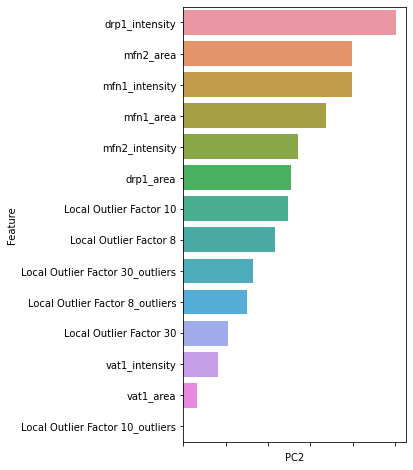

C:\Users\Uri8s\AppData\Local\Temp/ipykernel_32152/2271874030.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator



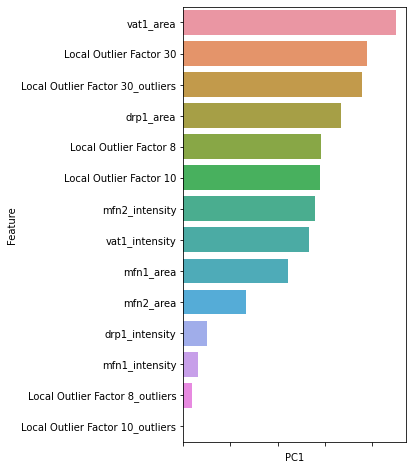

TypeError: 'float' object is not subscriptable

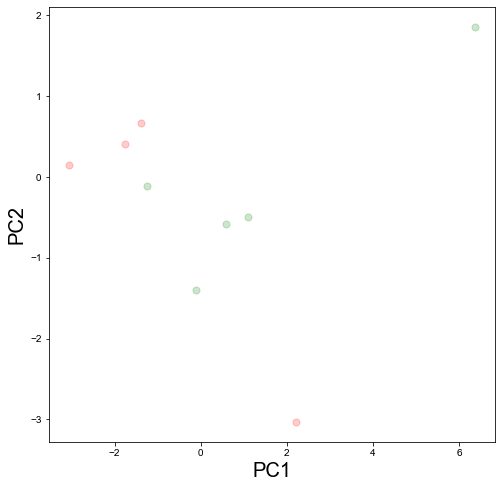

In [114]:
features = PCA_DATA_CLEAN.columns[1:]
x = PCA_DATA_CLEAN.loc[:, features].values
y = PCA_DATA_CLEAN.loc[:,['index2']].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
PCA_DATA_COMP = pd.DataFrame(data = principalComponents
               , columns = ['principal component 1', 'principal component 2'])
importances = pd.DataFrame(data = abs(pca.components_).transpose(), columns = ['PC1', 'PC2'])
importances['Feature'] = features
display(importances.sort_values('PC1', ascending = False).reset_index(drop = True))
imp = importances.sort_values('PC2', ascending = False)[0:30]
ax1 = sns.barplot(x = 'PC2', y = 'Feature', data = imp)
  
fig = ax1.get_figure()
fig.set_size_inches(4, 8)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90) 
plt.savefig(path + '\\' + 'pca1importancefeat1.pdf', dpi=600 )
plt.show()
imp2 = importances.sort_values('PC1', ascending = False)[0:30]
ax2 = sns.barplot(x = 'PC1', y = 'Feature', data = imp2)
fig = ax2.get_figure()
fig.set_size_inches(4, 8)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.savefig(path + '\\' + 'pca1importancefeat2.pdf', dpi=600 )
plt.show()

PCA_DATA_FINAL = pd.concat([PCA_DATA_COMP, PCA_DATA_CLEAN['index2']], axis = 1)
PCA_FIG = plt.figure(figsize = (8,8))
ax1 = PCA_FIG.add_subplot(1,1,1) 
ax1.set_xlabel('PC1', fontsize = 20, fontname="Arial")
ax1.set_ylabel('PC2', fontsize = 20, fontname="Arial")
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")

types = PCA_DATA_FINAL["index2"].unique()
targets1 = [index for index in types]
reds = list( Color("red").range_to(Color("white"),6))
greens = list( Color("green").range_to(Color("white"),6))
blues = list( Color("blue").range_to(Color("white"),6))

for target in targets1:
    if 'control' == target[:6]:
        color = blues[0] 
    elif 'ds' in target[:2]:
        color = reds[0] 
    else:
        color = greens[0]
    ## get saturation according time...
    if 'S' in target:
        alpha = 1
    elif 'P' in target:
        alpha = 0.5    
    else:
        alpha = 0.2
        
    

    indicesToKeep = PCA_DATA_FINAL['index2'] == target
    ax1.scatter(PCA_DATA_FINAL.loc[indicesToKeep, 'principal component 1']
            , PCA_DATA_FINAL.loc[indicesToKeep, 'principal component 2']
            , c = mpl.colors.to_hex(str(color)), alpha=alpha
            , s = 50)
scale = 6    
ax1.legend(targets1*scale,fontsize=6)
ax1.grid()



print(pca.explained_variance_ratio_)
plt.savefig(path + '\\' + 'pca3.pdf', dpi=600 )
plt.show()

In [7]:
drp1_df = drp1_df[["spots_chanel_4_final - Corrected Spot Intensity - Mean per Well",
"spots_chanel_4_final - Intensity_Spot chanel_4_final Mean - Mean per Well",
"all_cells - chanel_4_Intensity Mean - Mean per Well", "total_ir_chanel_4_normalized",
"modified_spots_chanel_4 - Total Spot Area - Mean per Well",
"all_cells - chanel_4 Profile 2/5  - Mean per Well", "all_cells - chanel_4 SER Spot 1 px - Mean per Well",
"all_cells - chanel_4 Gabor Max 2 px w2 - Mean per Well",
"all_cells - chanel_4 SER Edge 1 px - Mean per Well", "sample", "Severity", "Cell ID", "Compound",
                  "all_cells - chanel_1 Ratio Width to Length - Mean per Well",
                  "all_cells - chanel_1 Roundness - Mean per Well", "plate"]]
drp1_df

,spots_chanel_4_final - Corrected Spot Intensity - Mean per Well,spots_chanel_4_final - Intensity_Spot chanel_4_final Mean - Mean per Well,all_cells - chanel_4_Intensity Mean - Mean per Well,total_ir_chanel_4_normalized,modified_spots_chanel_4 - Total Spot Area - Mean per Well,all_cells - chanel_4 Profile 2/5 - Mean per Well,all_cells - chanel_4 SER Spot 1 px - Mean per Well,all_cells - chanel_4 Gabor Max 2 px w2 - Mean per Well,all_cells - chanel_4 SER Edge 1 px - Mean per Well,sample,Severity,Cell ID,Compound,all_cells - chanel_1 Ratio Width to Length - Mean per Well,all_cells - chanel_1 Roundness - Mean per Well,plate
0,93.897329,154.858854,2.879889,60.551020,5.087950,0.946400,0.041479,0.275963,0.314701,PRE4719.0mdivi1 25uM,PRE,4719.0,mdivi1 25uM,0.646277,0.944475,p1
1,94.422064,155.086924,2.306954,50.214737,4.829414,0.928632,0.035965,0.246534,0.271315,M4819.0mdivi1 25uM,M,4819.0,mdivi1 25uM,0.687475,0.964319,p1
2,111.356339,176.306134,3.486669,126.359229,6.367188,0.982735,0.039543,0.263517,0.304253,S4691.0mdivi1 25uM,S,4691.0,mdivi1 25uM,0.664465,0.940745,p1
3,117.178135,183.722554,4.051107,69.683344,6.971923,0.947986,0.040297,0.264703,0.310529,HC1650.0DMSO,HC,1650.0,DMSO,0.680581,0.948962,p1
4,116.929099,182.601592,3.626562,85.797979,7.304676,0.863878,0.033766,0.226762,0.267296,HC1653.0DMSO,HC,1653.0,DMSO,0.688030,0.950963,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,86.662793,146.068459,2.437199,59.529258,4.039044,0.923109,0.043008,0.277255,0.302349,HC1170.0DMSO,HC,1170.0,DMSO,0.632906,0.940030,p10
596,90.512288,151.123636,2.998779,54.119941,4.386449,0.942336,0.044863,0.284868,0.318305,HC848.0DMSO,HC,848.0,DMSO,0.644697,0.952561,p10
597,92.539490,152.994469,2.496228,43.350004,4.546628,0.936683,0.041696,0.276321,0.302267,S2165.0DMSO,S,2165.0,DMSO,0.679190,0.964656,p10
598,90.140776,149.886689,2.006329,54.640987,3.649282,0.876001,0.036901,0.240952,0.257712,M4196.0DMSO,M,4196.0,DMSO,0.665362,0.956735,p10


In [8]:
#rename features
drp1_df = drp1_df.rename(
     columns={ "spots_chanel_4_final - Corrected Spot Intensity - Mean per Well":"intensity_1",
"spots_chanel_4_final - Intensity_Spot chanel_4_final Mean - Mean per Well":"intensity_2",
"all_cells - chanel_4_Intensity Mean - Mean per Well":"intensity_3",

"total_ir_chanel_4_normalized":"area_1",
"modified_spots_chanel_4 - Total Spot Area - Mean per Well": "area_2",
"all_cells - chanel_4 Profile 2/5  - Mean per Well": "area_3",

"all_cells - chanel_4 SER Spot 1 px - Mean per Well": "texture_1",
"all_cells - chanel_4 Gabor Max 2 px w2 - Mean per Well": "texture_2",
"all_cells - chanel_4 SER Edge 1 px - Mean per Well": "texture_3" 
             })
drp1_df

,intensity_1,intensity_2,intensity_3,area_1,area_2,area_3,texture_1,texture_2,texture_3,sample,Severity,Cell ID,Compound,all_cells - chanel_1 Ratio Width to Length - Mean per Well,all_cells - chanel_1 Roundness - Mean per Well,plate
0,93.897329,154.858854,2.879889,60.551020,5.087950,0.946400,0.041479,0.275963,0.314701,PRE4719.0mdivi1 25uM,PRE,4719.0,mdivi1 25uM,0.646277,0.944475,p1
1,94.422064,155.086924,2.306954,50.214737,4.829414,0.928632,0.035965,0.246534,0.271315,M4819.0mdivi1 25uM,M,4819.0,mdivi1 25uM,0.687475,0.964319,p1
2,111.356339,176.306134,3.486669,126.359229,6.367188,0.982735,0.039543,0.263517,0.304253,S4691.0mdivi1 25uM,S,4691.0,mdivi1 25uM,0.664465,0.940745,p1
3,117.178135,183.722554,4.051107,69.683344,6.971923,0.947986,0.040297,0.264703,0.310529,HC1650.0DMSO,HC,1650.0,DMSO,0.680581,0.948962,p1
4,116.929099,182.601592,3.626562,85.797979,7.304676,0.863878,0.033766,0.226762,0.267296,HC1653.0DMSO,HC,1653.0,DMSO,0.688030,0.950963,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,86.662793,146.068459,2.437199,59.529258,4.039044,0.923109,0.043008,0.277255,0.302349,HC1170.0DMSO,HC,1170.0,DMSO,0.632906,0.940030,p10
596,90.512288,151.123636,2.998779,54.119941,4.386449,0.942336,0.044863,0.284868,0.318305,HC848.0DMSO,HC,848.0,DMSO,0.644697,0.952561,p10
597,92.539490,152.994469,2.496228,43.350004,4.546628,0.936683,0.041696,0.276321,0.302267,S2165.0DMSO,S,2165.0,DMSO,0.679190,0.964656,p10
598,90.140776,149.886689,2.006329,54.640987,3.649282,0.876001,0.036901,0.240952,0.257712,M4196.0DMSO,M,4196.0,DMSO,0.665362,0.956735,p10


In [65]:
# drp_data_for_batch = drp1_df.groupby(['sample', "Severity", "Cell ID", "Compound", "plate"],as_index=False).agg({
#                                                     'intensity_1':'mean',
#                                                     'intensity_2':'mean',
#                                                     'intensity_3':'mean',
#                                                     'area_1':'mean', 
#                                                     'area_2':'mean',
#                                                     'area_3':'mean', 
#                                                     'texture_1':'mean',
#                                                     'texture_2':'mean', 
#                                                     'texture_3':'mean', 
#                                                                 })
# drp_data_for_batch

,sample,EXP,Severity,Cell ID,Compound,plate,intensity_1,intensity_2,intensity_3,area_1,area_2,area_3,texture_1,texture_2,texture_3
0,HC1016.0DMSO,17,HC,1016.0,DMSO,p10,93.027842,153.770652,2.460611,53.752330,4.472841,0.926101,0.044281,0.287702,0.314074
1,HC1170.0DMSO,17,HC,1170.0,DMSO,p10,85.692029,144.810384,2.361752,51.619055,3.688647,0.910342,0.041701,0.276742,0.292873
2,HC143.0DMSO,15,HC,143.0,DMSO,p6,76.185653,133.605722,1.750878,31.961158,2.938556,0.923896,0.042971,0.285886,0.302326
3,HC143.0DMSO,15,HC,143.0,DMSO,p7,74.877543,131.761909,1.923068,36.900984,2.824975,0.921602,0.043012,0.284206,0.305104
4,HC1650.0DMSO,13,HC,1650.0,DMSO,p1,110.568721,176.253985,3.524584,61.397452,6.968336,0.927243,0.039696,0.262466,0.301521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,S4691.0mdivi1 25uM,13,S,4691.0,mdivi1 25uM,p1,105.732541,169.488504,4.069350,102.353953,5.948844,0.930612,0.036427,0.239689,0.279124
94,S4709.0DMSO,16,S,4709.0,DMSO,p9,77.427172,135.437431,2.452727,52.737600,3.070149,0.913019,0.045390,0.298209,0.324862
95,S4709.0mdivi1 25uM,16,S,4709.0,mdivi1 25uM,p9,84.917745,143.069385,1.747609,39.415136,2.928449,0.915738,0.041423,0.279342,0.295957
96,S4807.0DMSO,16,S,4807.0,DMSO,p8,86.120045,144.347318,1.780605,48.979655,2.897757,0.952933,0.040934,0.278363,0.292855


In [66]:
# drp_data_for_batch.columns = [str(col) + '_drp1' for col in drp_data_for_batch.columns]
# drp_data_for_batch = drp_data_for_batch.rename(
#      columns={"sample_drp1":"sample",
#               "EXP_drp1":"EXP",
#               "plate_drp1":"plate",
#               "Severity_drp1":"severity",
#               "Cell ID_drp1":"cell_id",
#               "Compound_drp1":"compound",
#                 "all_cells - chanel_1 Ratio Width to Length - Mean per Well_drp1": 
#               "all_cells - chanel_1 Ratio Width to Length - Mean per Well",
#             "all_cells - chanel_1 Roundness - Mean per Well_drp1": "all_cells - chanel_1 Roundness - Mean per Well"
#              })
# drp_data_for_batch

,sample,EXP,severity,cell_id,compound,plate,intensity_1_drp1,intensity_2_drp1,intensity_3_drp1,area_1_drp1,area_2_drp1,area_3_drp1,texture_1_drp1,texture_2_drp1,texture_3_drp1
0,HC1016.0DMSO,17,HC,1016.0,DMSO,p10,93.027842,153.770652,2.460611,53.752330,4.472841,0.926101,0.044281,0.287702,0.314074
1,HC1170.0DMSO,17,HC,1170.0,DMSO,p10,85.692029,144.810384,2.361752,51.619055,3.688647,0.910342,0.041701,0.276742,0.292873
2,HC143.0DMSO,15,HC,143.0,DMSO,p6,76.185653,133.605722,1.750878,31.961158,2.938556,0.923896,0.042971,0.285886,0.302326
3,HC143.0DMSO,15,HC,143.0,DMSO,p7,74.877543,131.761909,1.923068,36.900984,2.824975,0.921602,0.043012,0.284206,0.305104
4,HC1650.0DMSO,13,HC,1650.0,DMSO,p1,110.568721,176.253985,3.524584,61.397452,6.968336,0.927243,0.039696,0.262466,0.301521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,S4691.0mdivi1 25uM,13,S,4691.0,mdivi1 25uM,p1,105.732541,169.488504,4.069350,102.353953,5.948844,0.930612,0.036427,0.239689,0.279124
94,S4709.0DMSO,16,S,4709.0,DMSO,p9,77.427172,135.437431,2.452727,52.737600,3.070149,0.913019,0.045390,0.298209,0.324862
95,S4709.0mdivi1 25uM,16,S,4709.0,mdivi1 25uM,p9,84.917745,143.069385,1.747609,39.415136,2.928449,0.915738,0.041423,0.279342,0.295957
96,S4807.0DMSO,16,S,4807.0,DMSO,p8,86.120045,144.347318,1.780605,48.979655,2.897757,0.952933,0.040934,0.278363,0.292855


In [16]:
path = ('Results_noam_markers_ready_with_plate')
if not os.path.exists(path):
    os.mkdir(path)
    print('Output folder created')

Output folder created


In [17]:
drp1_df.to_csv(path + "//" + 'drp1.csv', index=None)